In [21]:
# for cvs file
import pandas as pd,  numpy as np, os
working_directory = os.getcwd()
import pickle
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import seaborn as sns

In [9]:
# read csv data
tmqm_data = pd.read_csv(working_directory+'/tmQM_y.csv', sep=';', header=0)

In [10]:

# Feature Columns
features = ["Electronic_E", "Dispersion_E", "Dipole_M", "Metal_q", "HOMO_Energy", "LUMO_Energy", "Polarizability"]
X = tmqm_data[features] #.values

# Target Column
target = ["HL_Gap"]
y = tmqm_data[target] #.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [17]:
error_list = list()

# iterate through various possibilities of the number of trees
tree_list = [100, 300, 500, 1000, 2000, 5000, 10000, 20000, 40000]
for n_trees in tree_list:
    GBR = GradientBoostingRegressor(max_features=7, n_estimators=n_trees, random_state=42)
    
    # Fit the model
    print(f'Fitting model with{n_trees} trees')
    GBR.fit(X_train.values, y_train.values)
    y_pred = GBR.predict(X_test)
    
    # Get the error (mean squared error)
    error = mean_squared_error(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))
    
error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')    
error_df  

Fitting model with100 trees


/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting model with300 trees


/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting model with500 trees


/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting model with1000 trees


/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting model with2000 trees


/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting model with5000 trees


/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting model with10000 trees


/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting model with20000 trees


/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting model with40000 trees


/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,error
n_trees,
100.0,1.064594e-05
300.0,2.783880e-06
500.0,1.851246e-06
1000.0,1.139697e-06
2000.0,6.874743e-07
5000.0,3.634972e-07
10000.0,2.647438e-07
20000.0,2.232594e-07
40000.0,2.096777e-07


In [18]:
pickle.dump(error_df, open('error_df.p', 'wb')) 

In [19]:
error_df = pickle.load(open('error_df.p', 'rb'))

(0.0, 44000.0)

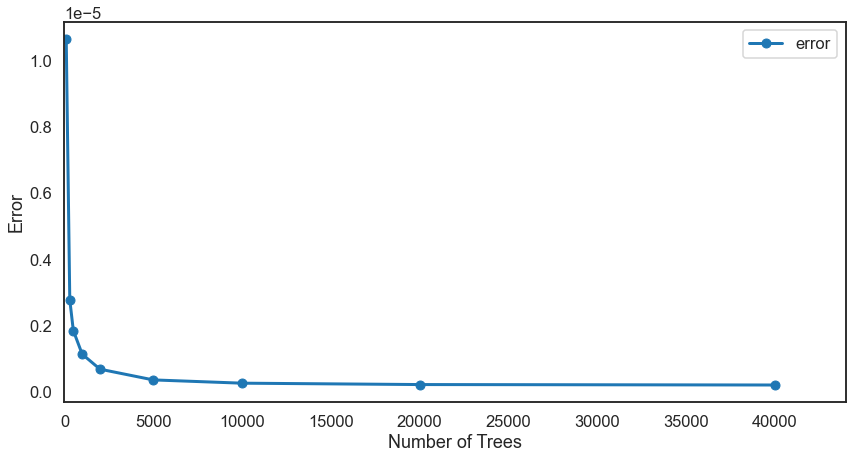

In [22]:
sns.set_context('talk')
sns.set_style('white')

# Create the plot
ax = error_df.plot(marker='o', figsize=(14,7), linewidth=3)

# Set parameter
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1)

In [26]:
from sklearn.model_selection import GridSearchCV

# Note: Running hours here took more than 3 hours
# The parameters to be fit
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
               'subsample': [0.5],
               'max_features': [6, 7]}

# The grid search object
GV_GBR = GridSearchCV(GradientBoostingRegressor(n_estimators= 1000, random_state=42), # 1000 trees to avoid model complexity
                 param_grid= param_grid,
                 scoring='neg_mean_squared_error',  # appropriate scoring method for regression
                 n_jobs=-1)

# Do the grid search
GV_GBR = GV_GBR.fit(X_train, y_train)

/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/BomBastic1/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

In [27]:
# After fitting GridSearchCV
best_model = GV_GBR.best_estimator_
best_model

GradientBoostingRegressor(max_features=7, n_estimators=1000, random_state=42,
                          subsample=0.5)

In [29]:
# calculate MAE
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {mae}')

# calculate MSE
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

# calculate RMSE
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')


# Calculate the R2
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

        

mae: 0.0009006277324459129
mse: 1.3894895704973655e-06
rmse: 0.0011787661220519386
R2: 0.9987790577272115


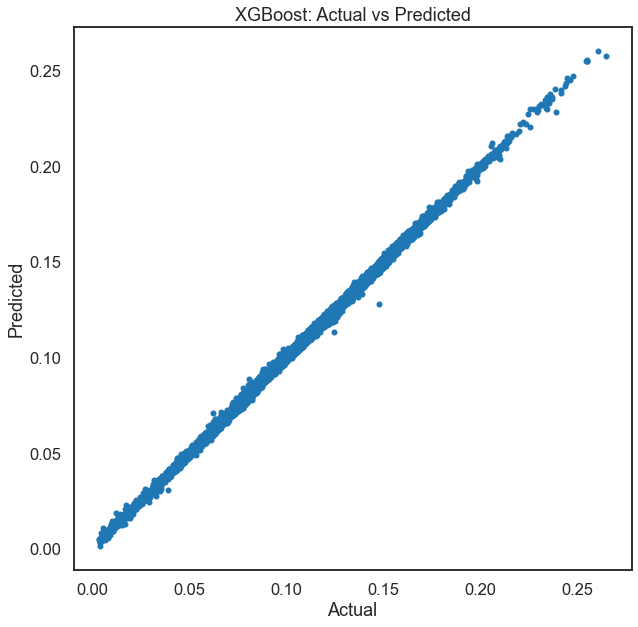

In [36]:
# visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, s=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs Predicted')
plt.show()


Text(0.5, 1.0, 'XGBoost Feature Importance')

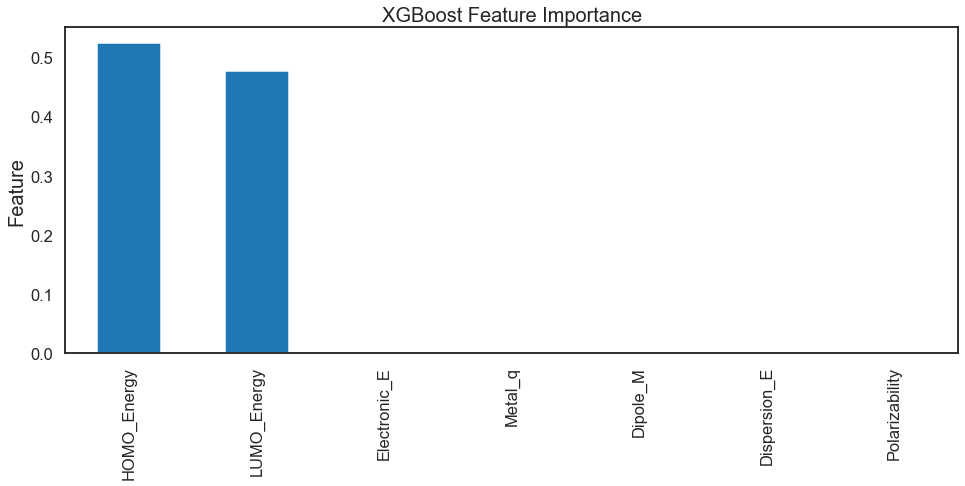

In [37]:
feature_imp = pd.Series(best_model.feature_importances_, index=tmqm_data[features].columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set_ylabel('Relative Importance', fontsize=20)
ax.set_ylabel('Feature', fontsize=20)
ax.set_title('XGBoost Feature Importance', fontsize=20)